In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [8]:
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [9]:
df.loc[1]['Text']

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

Text Preprocessing

In [15]:
!pip install textblob
!pip install nltk


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   --- ----------------------------------- 51.2/624.3 kB 435.7 kB/s eta 0:00:02
   --- ----------------------------------- 51.2/624.3 kB 435.7 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/624.3 kB 654.6 kB/s eta 0:00:01
   --------- ---------------------------- 153.6/624.3 kB 654.6 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/624.3 kB 793.0 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/624.3 kB 793.0 kB/s eta 0:00:01
   --------------------- ---------------- 358.4/624.3 kB 890.4 kB/s eta 0:00:01
   --------------------- ---------------- 358.4/624.3 kB 890.4 kB/s eta 0:00:01
   ----------------------------- -------- 481.3/624.3 kB 971.2 kB/s eta 0:00:01
   ----------------------------- -------- 481.3/624.3 kB 971.2 kB

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...


True

In [19]:
#import libraries
from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word

#lower casting removing punctuations
df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')

print(df['Text'].head(5))

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object


In [21]:
# Removal of Stop Words 
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [ ]:
#import Libraries
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob

# Function for Spelling Correction Using TextBlob
def Correct_spelling(text):
    blob = TextBlob(text)
    corrected_Text = blob.correct()
    return str(corrected_Text)

#Apply spelling correction with tqdm progress bar
tqdm.pandas(desc='spelling Correction')
df["Text"] = df['Text'].progress_apply(Correct_spelling)

#Display the first 5rowsof the Data frame with corrected Text
print(df['Text'].head(5))


In [23]:
# Lematization
df['Text'] = df['Text'].apply(lambda x:"".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

0    boughtseveralvitalitycanneddogfoodproductfound...
1    productarrivedlabeledjumbosaltedpeanuts...thep...
2    confectionaroundcenturies.light,pillowycitrusg...
3    lookingsecretingredientrobitussinbelievefoundi...
4    greattaffygreatprice.wideassortmentyummytaffy....
Name: Text, dtype: object

Exploratory Data Analysis

In [25]:
# create a new dataframe "reviews" tom perform  exploratory data analysis
reviews = df
#droping null values
reviews.dropna(inplace=True)

In [26]:
df.shape

(568401, 10)

In [27]:
reviews.shape

(568401, 10)

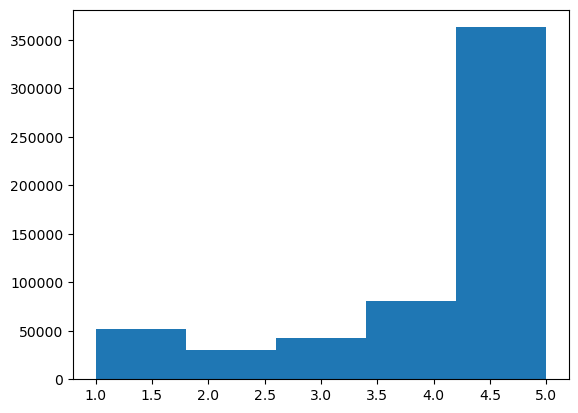

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [ ]:
#The histogram reveals this dataset is highly unbalanced towars high rating
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [30]:
# To make it balanced data, we sampled each score by the lowest n-count from above (i.e, 29743 reviews scored as '2')

score_1 = reviews[reviews['Score']==1].sample(n=29743)
score_2 = reviews[reviews['Score']==2].sample(n=29743)
score_3 = reviews[reviews['Score']==3].sample(n=29743)
score_4 = reviews[reviews['Score']==4].sample(n=29743)
score_5 = reviews[reviews['Score']==5].sample(n=29743)

In [31]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [32]:
print(29743+29743+29743+29743+29743)
reviews_sample.shape

148715


(148715, 10)

In [33]:
reviews_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,85094,B003JO71D8,A2XKXXP9LAOJOJ,"amn bookworm ""readalot""",3,4,1,1336694400,Not what I expected!,"graincameziplockbag,smallamountpoorquality.sta..."
1,146649,B001KNASEO,AVG1W6YIWYVLD,kellyr,3,3,1,1314144000,Product was completely dried out!,"wantedsaywantgetdoghealthysnackalternative,pro..."
2,48180,B004SRH2B6,A20QIVFCEDD8PN,scchris2,0,1,1,1308528000,Horrible tasting,likeflavorcoconutwater.loveflavormango.<br/>th...
3,85406,B002DHTWNO,A29SZ5CBMUN9KV,hey dog,0,1,1,1347062400,RUN AWAY FAST,"lovebeefjerkygoodway.very,fatty,greasytouchbla..."
4,472386,B007ZUFEDG,A3AUTBIPRKNHQR,Chelly,2,3,1,1347148800,Waggin Train Linked to over 2000 deaths,waggintraininvestigationsince20072000dogdeathi...


In [34]:
# printing count by 'Score' to check dataset is now balnced
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [38]:
pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------- 20.5/299.9 kB ? eta -:--:--
   -- ------------------------------------- 20.5/299.9 kB ? eta -:--:--
   -- ------------------------------------- 20.5/299.9 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/299.9 kB 512.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 512.0 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 368.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 368.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/299.9 kB 447.8 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/299.9 kB 580.1 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 656.1 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 639.5 kB/s eta 0:00:00
No

In [39]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

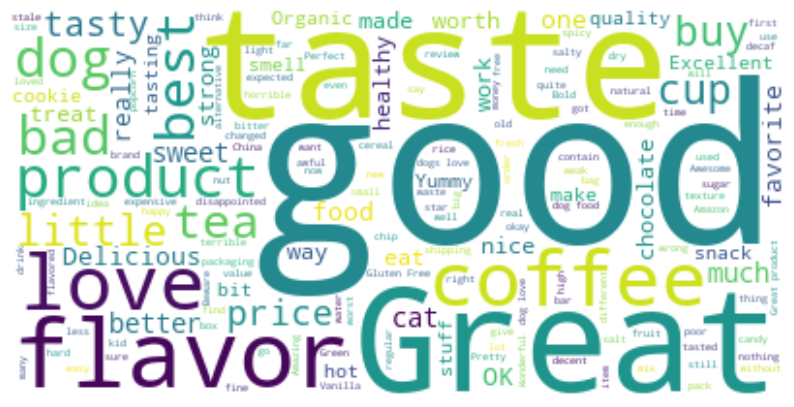

In [42]:
# wordcloud function's input needs to be a single string of text
# Here I'm concatenating all summaries into a single string
# Simimilarity you can build for text column

reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='White').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


In [43]:
reviews_sample[reviews_sample['Score']==1]['Text'].loc[0]

'graincameziplockbag,smallamountpoorquality.startover,grainreceivedgrownall,despitecarefulcare.disappointed!'

In [45]:
# Now let's split the data into Negative (Score is 1 or 2) and positive (4 or 5) Reviews
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

# Transform to single String 
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)


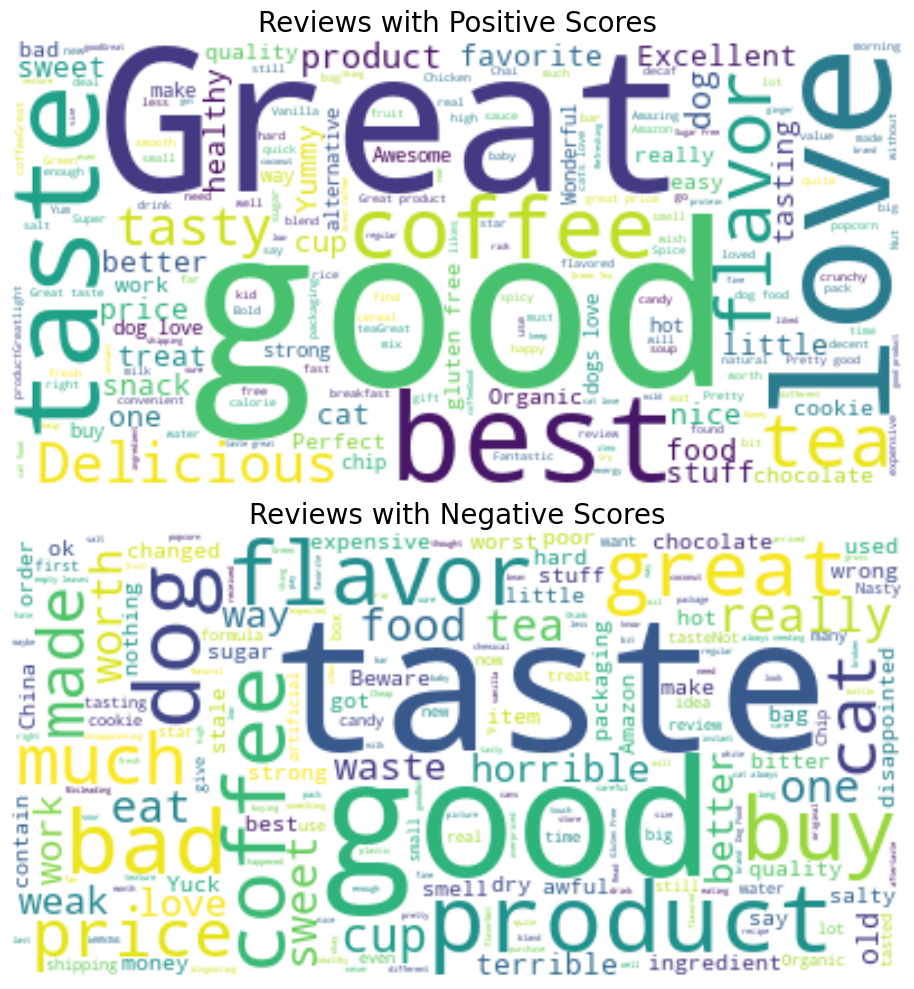

In [46]:
import matplotlib.pyplot as plt

#Create a new figure
fig = plt.figure(figsize=(10, 10))

# Add Subplot 1 for positive word cloud
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Positive Scores', fontsize=20)


# Add Subplot 2 for Negative word cloud
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Negative Scores', fontsize=20)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()



In [47]:
!pip install vaderSentiment
import seaborn as sns
import re 
import os
import sys
import ast
plt.style.use('fivethirtyeight')

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------------------- ------------- 81.9/126.0 kB 176.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 176.6 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 218.3 kB/s eta 0:00:01
   --------------------------------------

In [56]:
# Function for the getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Clean the 'Text' column
df['Text'] = df['Text'].fillna("").astype(str)

# Initialize Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiments
emptyline = []
for row in tqdm(df['Text'], total=len(df), desc='Analyzing Sentiments'):
    vs = analyzer.polarity_scores(row)  # Ensure 'row' is always valid
    emptyline.append(vs)

# Create DataFrame with sentiment scores
df_sentiments = pd.DataFrame(emptyline)
print(df_sentiments)


Analyzing Sentiments: 100%|██████████| 5/5 [00:00<00:00, 4967.20it/s]

     neg    neu    pos  compound
0  0.000  0.313  0.687    0.6588
1  0.649  0.351  0.000   -0.5719
2  0.000  0.000  0.000    0.0000
3  0.000  0.000  0.000    0.0000
4  0.000  0.343  0.657    0.6956


In [78]:
np.where(df_sentiments['compound'] >=0, 'Positive', 'Negative')

array(['Positive', 'Negative', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

In [86]:
# Convert Scores into Positive and negative sentiments usingsome threshold
df_sentiments['Sentiment'] = np.where(df_sentiments['compound'] >=0, 'Positive','Negative')
df_sentiments.head()

,neg,neu,pos,compound,Sentiment
0,0.000,0.313,0.687,0.6588,Positive
1,0.649,0.351,0.000,-0.5719,Negative
2,0.000,0.000,0.000,0.0000,Positive
3,0.000,0.000,0.000,0.0000,Positive
4,0.000,0.343,0.657,0.6956,Positive


In [87]:
df_sentiments['Sentiment'].value_counts()

Sentiment
Positive    4
Negative    1
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

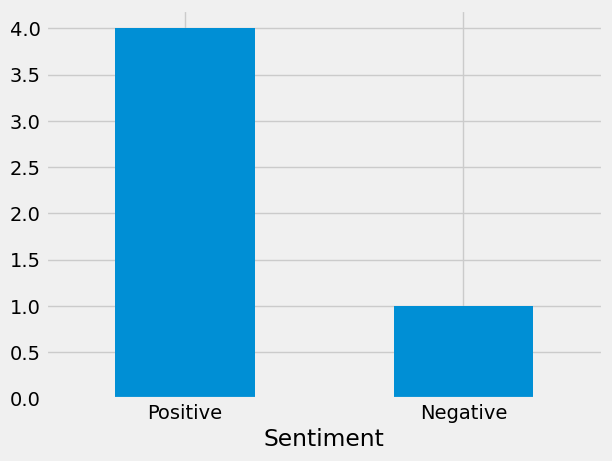

In [88]:
result = df_sentiments['Sentiment'].value_counts()
result.plot(kind='bar', rot=0)